In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install iminuit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 3.0 MB/s eta 0:00:00


In [3]:
from iminuit import Minuit

In [4]:
#Bikin fungsi untuk generate data
def line(x, m, c):
    return m*x + c
m_true = 9
c_true = 3
x = np.linspace(0, 100, 100)
y = line(x, m_true, c_true)

In [5]:
#kasih noise
y_err = 0.2*y
y = np.random.normal(y, y_err)


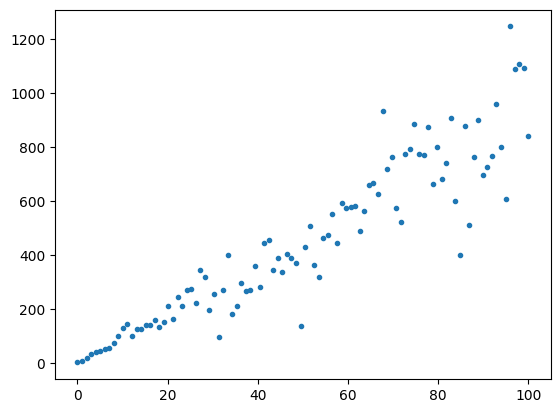

In [6]:
plt.plot(x, y, '.')

In [7]:
#definisi fungsi yang akan diminimalisasi
def LSQ(m, c):
    return np.sum((y - line(x, m, c)) ** 2 / y_err ** 2)

In [8]:
#initialisasi & pemanggilan kelas disimpan di var z
z = Minuit(LSQ, m = 1., c = 1.) #1 untuk LSQ, 0.5 untuk likelihood



In [9]:
z.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 114.3                      │              Nfcn = 31               │
│ EDM = 6.51e-23 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │   8.95    │   0.19    │            │            │         │         │       │
│ 1 │ c    │    3.0    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────┐
│   │      m      c │
├───┼───────────────┤
│ m │ 0.0344 -0.015 │
│ c │ -0.015  0.328 │
└───┴───────────────┘

In [10]:
m_fit = z.values["m"]
c_fit = z.values["c"]
print(m_fit)
print(c_fit)

8.954185493495043
3.0303740834309663


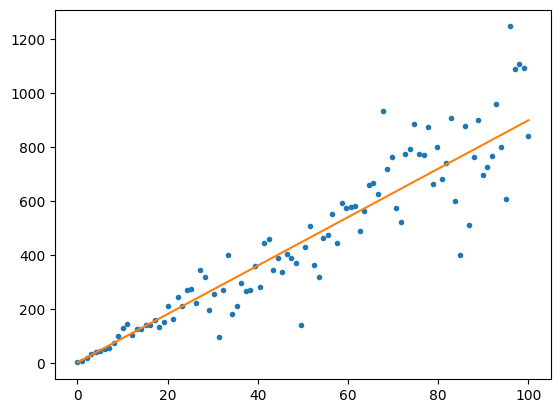

In [11]:
#fit garis fitting nya
y_fit = line(x, m_fit, c_fit)
plt.plot(x, y, '.')
plt.plot(x,y_fit, '-')